# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* [x] Ver el número de valores nulos
* [x] Representar el porcentaje de filas con atributos nulos.
* [x] Limpieza de columnas.
* [x] Saber la edad mínima y máxima de las personas del barco.
* [x] Conocer la mediana de las edades.
* [x] Ver los precios (columna `fares`) más altos y bajos.
* [x] Número de pasajeros embarcados (columna `Embarked`).
* [x] Ver la distribución de sexos en las personas embarcadas.

## Variables

`PassengerId`: Número de identificación del pasajero 

`Survived`: Variable binaria, que vale 0 cuando el pasajero sobrevivió y 1 cuando no sobrevivió

`Pclass`: Clase del Pasajero

`Name`: Nombre del pasajero

`Sex`: Sexo del pasajero

`Age`: Edad del pasajero

`SibSp`: Número de hermanos/esposas a bordo (Siblings/Spouse)

`Parch`: Número de padres/hijos a bordo (Parents/Children)

`Ticket`: Número del ticket

`Fare`: Tarifa del pasajero, en libras de 1912

`Cabin`: Identificación de la cabina del pasajero

`Embarked`: Puerto de embarcación: S = Southampton, C = Cherburgo, Q = Queenstown

Variables adicionales:
- `LastName`: Apellido del pasajero

- `Binary_Cabin`: Variable binaria, que vale 0 cuando los datos de Cabin son desconocidos, y 1 cuando son conocidos

- `Euro_Fare`: Tarifa del pasajero, en euros de abril de 2024

## Importamos las librerías

In [335]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Leemos el dataset

In [336]:
datos_originales = pd.DataFrame(pd.read_csv("titanic.csv")) 
display(datos_originales) 
df = datos_originales.copy() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Revisamos la información de los datos

### Datos Nulos

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


De las 12 variables, 3 tienen datos nulos. En cuanto a los tipos de datos, parecen correctos, aunque `Age` debería ser un int, a no ser que haya edades con decimales explícitamente (que veremos que así es).

In [338]:
df.isnull().sum() # Para visualizar el número total de valores nulos por columna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [339]:
df.isnull().sum() / len(df) * 100 # Para visualizar el porcentaje de valores nulos por columna

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Quizá pueda hacerse algo con edad o embarked, pero faltan demasiados datos de Cabin como para intentar estimarlos con los datos ya existentes.

### Age

In [340]:
df["Age"].describe() # Para ver estadísticas descriptivas rápidas de Age.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [341]:
df["Age"].sort_values().unique() # Para ver los valores únicos ordenados de Age

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

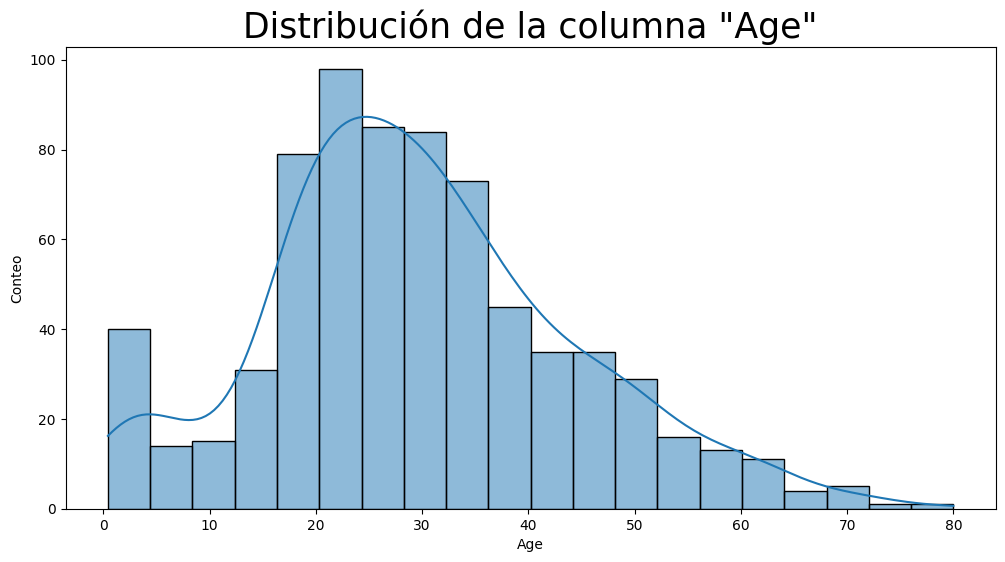

In [342]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de la columna "Age"', size=25)
plt.ylabel('Conteo');

Aquí nos enfrentamos a un problema, y es que, si sustituimos los valores faltantes de `Age` por la media o la mediana, podríamos deformar los datos por juntar demasiados en la media. Para un nivel introductorio está bien, pero quizá a un nivel más profesional podría ser interesante intentar predecir los valores de estas edades faltantes según ciertas características de los pasajeros, como las tarifas.

#### Sustituir por la mediana

In [343]:
df_Age_median = df.copy() # Creamos una copia de df en el que vamos a sustituir los valores faltantes de Age por la mediana
df_Age_median["Age"] = df_Age_median["Age"].fillna(df_Age_median["Age"].median())

In [344]:
df_Age_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


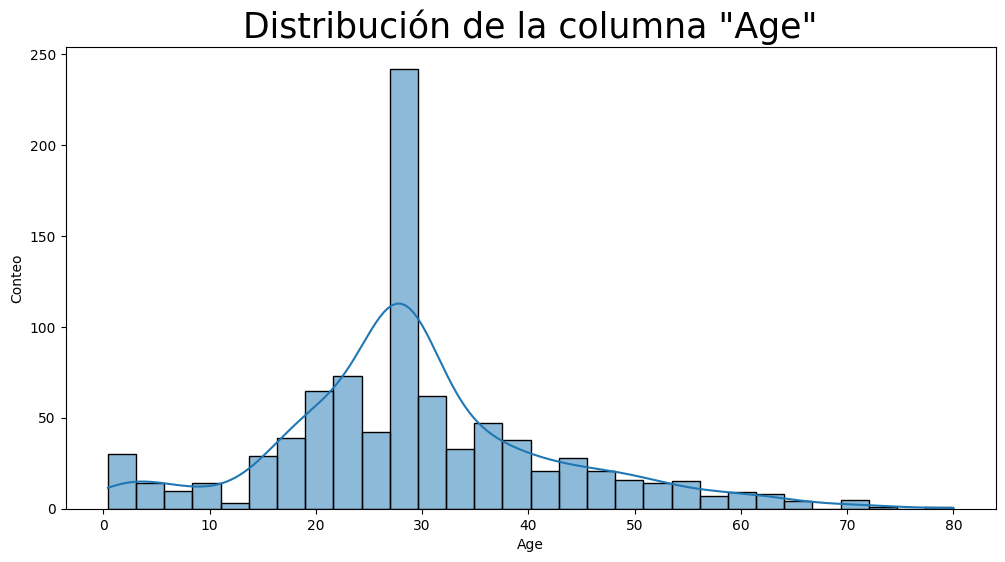

In [345]:
plt.figure(figsize=(12, 6))
sns.histplot(df_Age_median['Age'], kde=True)
plt.title('Distribución de la columna "Age"', size=25)
plt.ylabel('Conteo');

La media y la mediana son valores creíbles para sustituir unos pocos datos faltantes pues reducen el margen de error de estimación. Pero al sustituir tanta cantidad de datos, estamos "imponiendo" que el 20% de los valores sean el que hemos elegido, por lo que la "repartición" o distribución de los datos se rompe.

#### Sustituir con KNN

Una mejor manera podría ser intentar, a partir de los datos existentes, predecir los faltantes, para respetar la distribución

In [346]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [347]:
# Cargamos los datos
df_Age_knn = pd.read_csv('titanic.csv')

In [348]:
# Creamos la columna lastname para guardar el apellido de los pasajeros
df_Age_knn['LastName'] = df_Age_knn['Name'].apply(lambda x: x.split(',')[0])

In [349]:
# Vamos a normalizar Fare para asegurarnos que no tenga un impacto desproporcionado en la distancia 
scaler = StandardScaler()
df_Age_knn['Fare'] = scaler.fit_transform(df_Age_knn[['Fare']])

In [350]:
# estas son las columnas que se van a usar como predictores de Age
columnas=['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked',"Age"] #la edad tiene que tenerse en cuenta al predecir, los apellidos es una variable muy random y ruidosa para introducirse

# Aplicamos OneHotEncoder para codificar nuestras variables categóricas 
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df_Age_knn[columnas]))
df_encoded.columns = encoder.get_feature_names_out(columnas)

In [351]:
# Creamos dos dataframes basados en la presencia o ausencia de Age
df_encoded['Age'] = df_Age_knn['Age']
df_with_age = df_encoded.dropna(subset=['Age'])
df_without_age = df_encoded[df_encoded['Age'].isna()].drop(columns='Age')

In [352]:
# Dividimos el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(df_with_age.drop(columns='Age'), df_with_age['Age'], test_size=0.2, random_state=357)

scores = [219.08405565 122.88157895 223.62027544 135.65153772 167.68399386]
scores = [136.52994217  82.51329496 155.70730219 105.13201404 123.60082807]
scores = [130.4628458   60.18006121 135.48813665 108.51132836 116.9991268 ]
scores = [117.66245815  67.15095137 127.62349945 110.55036469 131.51371228]
scores = [125.76203809  68.63970772 127.35082789 125.38223218 134.64002067]
scores = [127.75953862  76.2862182  126.66201508 128.28372641 138.96856813]


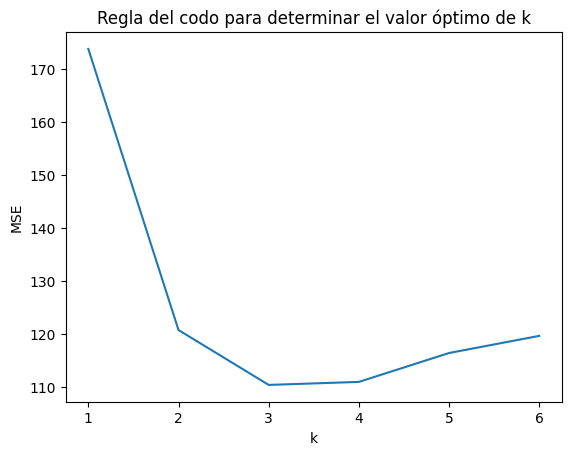

In [353]:
# Lista para almacenar los valores de MSE (Error Cuadrático Medio)
mse = []

# Rango de k para probar
k_range = range(1, 7)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Realizamos la validación cruzada para obtener una medida más robusta del error
    """ estamos tomando el negativo de los valores devueltos para obtener el MSE real. 
        Luego, añadimos la media de estos valores a nuestra lista de MSE para cada valor de k (mse.append(scores.mean())).
    """
    scores = -cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f'scores = {scores}')
    

# Graficamos los valores 
plt.plot(k_range, mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.title('Regla del codo para determinar el valor óptimo de k')
plt.show()

# Graficamos 

In [354]:
# Determinar el mejor valor de k
best_k = k_range[mse.index(min(mse))]
print(f'Mejor número K: {best_k}')

Mejor número K: 3


In [355]:
# Creamos el modelo KNN con el mejor valor de k
knn = KNeighborsRegressor(n_neighbors=best_k)

# Ajustamos el modelo a los datos sin valores nulos
knn.fit(X_train, y_train)

# Imputamos los valores faltantes en la columna 'Age'
imputed_ages = knn.predict(df_without_age)
df_Age_knn.loc[df_Age_knn['Age'].isna(), 'Age'] = imputed_ages

In [356]:
df["Age"][610:615] # Columna Age original

610    39.0
611     NaN
612     NaN
613     NaN
614    35.0
Name: Age, dtype: float64

In [357]:
df_Age_median["Age"][610:615] # Sustitución por la mediana

610    39.0
611    28.0
612    28.0
613    28.0
614    35.0
Name: Age, dtype: float64

In [358]:
df_Age_knn["Age"][610:615] # Sustitucion por KNN con k=3 para el rango (1,7)

610    39.000000
611    26.666667
612    21.666667
613    34.333333
614    35.000000
Name: Age, dtype: float64

In [359]:
df_Age_knn.describe() # Estadísticas de las variables numéricas del dataset con la transformación KNN...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.910000e+02
mean,446.000000,0.383838,2.308642,29.664523,0.523008,0.381594,3.987333e-18
std,257.353842,0.486592,0.836071,13.587806,1.102743,0.806057,1.000562e+00
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-6.484217e-01
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,-4.891482e-01
50%,446.000000,0.000000,3.000000,28.166667,0.000000,0.000000,-3.573909e-01
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,-2.424635e-02
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,9.667167e+00


In [360]:
df_Age_median.describe() # ... y con la transformación de la mediana (solo cambian Fare y Age)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [361]:
df.describe() # Sin transformación. Tiene las mismas estadísticas en Fare que df_Age_median, pero no en Age.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Como se puede ver, todas las estadísticas son iguales para todos los df salvo en `Fare` y `Age`, así que vamos a estar trabajando con df_Age_Knn, corrigiendo primero esa columna, que se normalizó para no perturbar los datos estimados. 

Por curiosidad, aquí también se puede ver la ratio de supervivencia de los pasajeros. Al ser `Survived` una variable que puede tomar el valor 0 si el pasajero no sobrevivió o 1 si sí sobrevivió, el promedio de la columna (no supervivientes * 0 + sí supervivientes * 1 entre número pasajeros) es la ratio de supervivencia. 

En esta base de datos, con 891 pasajeros, la ratio es del 38,4%, por lo que podemos deducir que la variable binaria está bien definida, pues es bastante cercano a la ratio de supervivencia [del total de la tripulación](https://es.wikipedia.org/wiki/Anexo:Pasajeros_a_bordo_del_RMS_Titanic#:~:text=Esta%20es%20una%20lista%20de,(contando%20pasajeros%20y%20tripulación).). En ese enlace, además, podemos hacer una búsqueda para verificar que, por ejemplo, el hombre con el ID número 31, que también sale en nuestro csv, falleció, por lo que confirmamos que dicha variable está catalogada de esa manera. Aunque el consenso suele ser que el valor 1 es la afirmación de lo que se mide (en este caso, el nombre de la columna, si sobrevivió), nunca está de más intentar confirmarlo.

In [362]:
df_Age_knn["Fare"].describe() # La variable Fare está normalizada

count    8.910000e+02
mean     3.987333e-18
std      1.000562e+00
min     -6.484217e-01
25%     -4.891482e-01
50%     -3.573909e-01
75%     -2.424635e-02
max      9.667167e+00
Name: Fare, dtype: float64

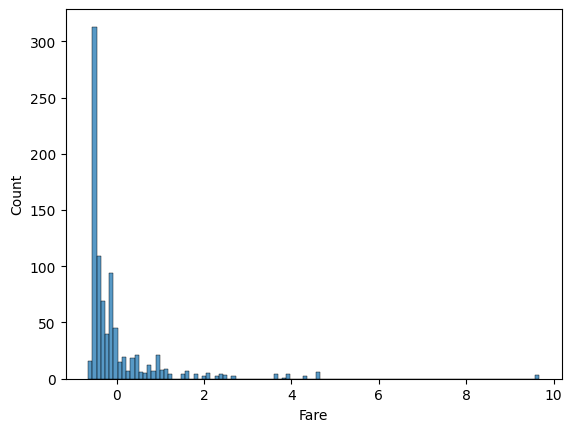

In [363]:
fare_knn = sns.histplot(df_Age_knn['Fare']); # La mayoría de los datos de las tarifas (Q3) están a la izquierda de 0, es decir, por debajo de la media

In [364]:
df2 = df_Age_knn.copy()  # Renombramos el dataframe para resumir el nombre.
df2 = pd.DataFrame(df2)  # Convertimos el dataframe en un objeto de tipo DataFrame.
df2["Fare"] = df["Fare"] # Deshacemos la normalización retornando los valores originales de la tarifa.

In [365]:
df2["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

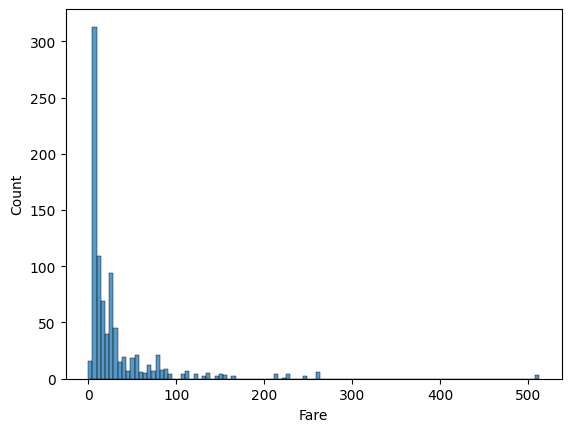

In [366]:
sns.histplot(df2['Fare']); # De igual manera, el 75% de los datos está por debajo de la media, pero ahora el eje horizontal es el precio

Por comodidad, vamos a pasar los valores de libras de 1912 a euros. Como se puede consultar [en este enlace](https://www.bankofengland.co.uk/monetary-policy/inflation/inflation-calculator?number.Sections%5B0%5D.Fields%5B0%5D.Value=1&current_year=1.39875039208645&comparison_year=133.472), según el Banco de Inglaterra, la inflación acumulada desde 1912 es tal que ha multiplicado los precios por, aproximadamente, 95,42231463 (este dato se consiguió pasando 1 millón de libras de 1912 a libras de abril de 2024, para obtener gran cantidad de decimales para ganar precisión). Además, el tipo de cambio Libra/Euro oficial a 30 de abril de 2024, que puede consultarse [en este otro enlace](https://www.bankofengland.co.uk/boeapps/database/Rates.asp?TD=30&TM=Apr&TY=2024&into=EUR&rateview=A), también del Banco de Inglaterra, fue de 0,8539 libras por cada euro. Es decir, que el tipo de cambio Euro/Libra fue de 1/0,8539 = 1,1711 euros por cada libra.

En definitiva, crearemos una columna nueva en la que multiplicamos la Tarifa original por la inflación acumulada desde 1912 hasta abril de 2024, y después aplicaremos el tipo de cambio oficial para obtener los precios en euros y entenderlos mejor.

In [367]:
df2["Euro_Fare"] = df2["Fare"] * 95.42231463 * 1.1711   # Convertimos la tarifa de libras de 1912 a libras de abril del 2024,
                                                        # y de libras de abril 2024 a euros de abril 2024

In [368]:
df2["Euro_Fare"].describe() # Estadísticas de la tarifa en euros

count      891.000000
mean      3598.790376
std       5553.194563
min          0.000000
25%        883.979864
50%       1615.243446
75%       3464.221253
max      57252.312998
Name: Euro_Fare, dtype: float64

Aclaración: al multiplicar todos los valores de `Fare` por la misma constante, no estamos alterando la distribución de los datos ni sus estadísticas (kde, área bajo los cuartiles, etc), simplemente se "ubican" en una escala distinta. Por lo tanto, los máximos y mínimos, por ejemplo de Euro Fare son los que correspondían con los máximos y mínimos de `Fare` antes de aplicar las operaciones, así como su distribución en los cuartiles.

### Embarked

In [369]:
df2["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

En este caso, como solo faltan 2 datos, podemos asignarles la moda

In [370]:
df2["Embarked"].fillna(df2["Embarked"].mode()[0], inplace=True)
df2["Embarked"].value_counts()

C:\Users\juanv\AppData\Local\Temp\ipykernel_28584\4176367651.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Cabin

In [371]:
df2["Cabin"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Cabin
Non-Null Count  Dtype 
--------------  ----- 
204 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [372]:
df2["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [373]:
df2["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [374]:
df2["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Al faltar el 77% de los datos, no sería muy recomendable rellenar la información que queda con la que tenemos disponible. Además, aunque quisiéramos hacerlo, al no ser una variable categórica que tome pocos valores, tampoco se puede sustituir por la moda, pues el valor más repetido (que son 3 valores distintos) se repite unas 4 veces. Por lo tanto, tenemos 3 alternativas:

1. En caso de que la variable NO sea importante, considerar eliminar la columna.

2. En caso de que la variable sí sea importante:

    i. Transformar la variable `Cabin` en una variable binaria que tome dos valores: 0 si NO se conocía el valor de la variable, o 1 si SÍ se conocía su valor, y/o...

    ii. Dejar la variable tal y como está.

Por ahora, podemos dejar la variable `Cabin` inalterada, añadiendo una columna más con los datos con la transformación binaria.

In [375]:
df2["Cabin"].isnull() # Los True y False, son reemplazados...

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [376]:
df2["Binary_Cabin"] = [0 if pd.isnull(i) else 1 for i in df2["Cabin"]] # ... por 0 y 1, respectivamente
df2["Binary_Cabin"]

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Binary_Cabin, Length: 891, dtype: int64

In [377]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Euro_Fare,Binary_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,810.180777,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,7965.842671,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,885.611401,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,5933.875758,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,899.580035,0


## Análisis de los datos

### Comenzamos analizando qué variables tenemos como punto de partida.

Una vez arreglados los problemas con los datos nulos y faltantes, revisamos la info de todo el df de nuevo

In [378]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  LastName      891 non-null    object 
 13  Euro_Fare     891 non-null    float64
 14  Binary_Cabin  891 non-null    int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 104.5+ KB


In [379]:
# Sacamos los nombres de las columnas numéricas y categóricas
def tipo_de_columnas_ordenadas (df2):
    cat = []
    num_int = []
    num_float = []
        
    for col in df2.columns:
        if(df2[col].dtype == "object"):
            cat.append(col)
        elif(df2[col].dtype == "int64"):
            num_int.append(col)
        else:
            num_float.append(col)

    return cat , num_int, num_float

cat , num_int, num_float = tipo_de_columnas_ordenadas(df2)
print(f"Tenemos {len(cat)} variables categóricas, que son: ", cat)
print(f"Tenemos {len(num_int)} variables numéricas con números enteros, que son: ", num_int)
print(f"Tenemos {len(num_float)} variables numéricas con decimales, que son: ", num_float)

Tenemos 6 variables categóricas, que son:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'LastName']
Tenemos 6 variables numéricas con números enteros, que son:  ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Binary_Cabin']
Tenemos 3 variables numéricas con decimales, que son:  ['Age', 'Fare', 'Euro_Fare']


Habiendo revisado el df, consideremos los siguientes comentarios, teniendo siempre en cuenta que nuestra variable principal es estudiar la supervivencia de los pasajeros con `Survived`:

- La variable `PassengerId` es una variable que identifica a cada pasajero, muestra un orden en los datos, no una característica personal del pasajero, por lo que podría ser razonable no usar esta variable ya que no parece una característica relevante como tal.

- `SibSp` y `Parch` parecen, a priori, poco útiles para explicar la supervivencia, pues el accidente del Titanic vino dado por factores externos o exógenos y no parece que aporte información relevante más que para catalogar las pérdidas entre familiares específicos, no para agregar grandes datos, por lo que tampoco los usaremos si queremos estudiar el df entero.

- `Ticket` parece que agrupa a la gente por familias o grupos de gente que compraron el ticket juntos para un viaje en familia o con amigos, algo que podría ser interesante. Sin embargo, como en el caso anterior, más que reunir o agrupar los datos por características comunes, acaba segregando la muestra, por lo que su uso será prácticamente anecdótico.

- `Cabin` funciona similar a la variable anterior, así que tampoco sería usada en condiciones normales. Así que ahora que nos falta el 77% de los datoas, todavía menos. Aunque lo que sí podemos usar es `Binary_Cabin`.

- `Name` y `LastName` tienen el mismo problema, pueden servir para identificar personas específicas (Name) o para agrupar por apellidos (lo que podría indicar que podrían juntarse por familias con esta variable, pero podrían repetirse), pero tampoco parece relevante de cara a la supervivencia.

En definitiva, teniendo en cuenta los anteriores comentarios, nuestras variables resultantes serían las siguientes:

- Numéricas con enteros: `Survived`, `Binary_Cabin` y `Pclass` (3 variables)
- Numéricas con decimales: `Age`, `Fare` y `Euro_Fare` (3 variables)
- Categóricas o atributos: `Sex` y `Embarked` (2 variables)

Quedándonos con 6 variables numéricas y 2 categóricas entre las que explorar, 8 de las 15 que había inicialmente.

Por lo tanto, nuestro análisis seguirá un esquema del siguiente tipo: "¿Qué le pasó a `Survived` teniendo en cuenta esta/estas variables?"

Adicionalmente, por comodidad y por poder trabajar con distintos df según convenga, podemos crear un df con únicamente estas variables, y crear nuevas variables ahí directamente si procede.

In [380]:
df3 = df2.copy()
df3.drop(columns=["PassengerId", "SibSp", "Parch", "Ticket", "Cabin", "Name", "LastName"], inplace=True)
df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Euro_Fare,Binary_Cabin
0,0,3,male,22.0,7.2500,S,810.180777,0
1,1,1,female,38.0,71.2833,C,7965.842671,1
2,1,3,female,26.0,7.9250,S,885.611401,0
3,1,1,female,35.0,53.1000,S,5933.875758,1
4,0,3,male,35.0,8.0500,S,899.580035,0


In [381]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Sex           891 non-null    object 
 3   Age           891 non-null    float64
 4   Fare          891 non-null    float64
 5   Embarked      891 non-null    object 
 6   Euro_Fare     891 non-null    float64
 7   Binary_Cabin  891 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [382]:
df3.describe() # Esto tiene en cuenta las variables numéricas solamente

,Survived,Pclass,Age,Fare,Euro_Fare,Binary_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.664523,32.204208,3598.790376,0.228956
std,0.486592,0.836071,13.587806,49.693429,5553.194563,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,7.910400,883.979864,0.000000
50%,0.000000,3.000000,28.166667,14.454200,1615.243446,0.000000
75%,1.000000,3.000000,37.000000,31.000000,3464.221253,0.000000
max,1.000000,3.000000,80.000000,512.329200,57252.312998,1.000000


#### Variables numéricas enteras

##### Supervivientes

In [383]:
df3["Survived"].value_counts() # 0 = No sobrevivió, 1 = Sobrevivió.

Survived
0    549
1    342
Name: count, dtype: int64

In [384]:
df3["Survived"].value_counts()/len(df3["Survived"])*100 # Sobrevivió el 38.38% de los pasajeros, y el 61.62% no sobrevivió.

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

##### Categoría de clase del viaje

In [385]:
df3["Pclass"].value_counts() # 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [386]:
df3["Pclass"].value_counts()/len(df3["Pclass"])*100 # 24% en primera clase, 21% en segunda y 55% en tercera

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64

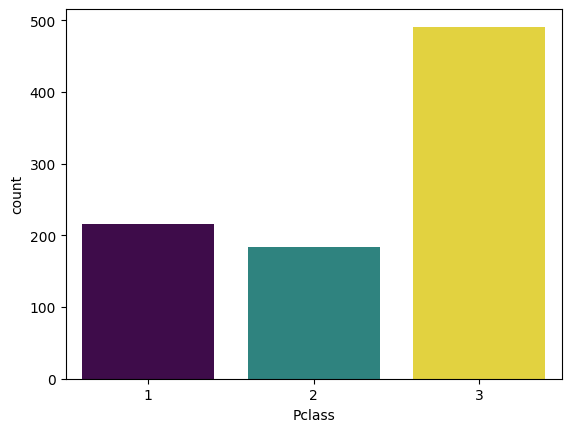

In [387]:
fig = sns.countplot(data=df3, x="Pclass", palette="viridis", hue="Pclass", legend=False)

##### `Binary_Cabin` se creó para no borrar la variable `Cabin` por los pocos datos que tenía

In [388]:
df3["Binary_Cabin"].value_counts() # 0 = Sin cabina conocida, 1 = Con cabina conocida

Binary_Cabin
0    687
1    204
Name: count, dtype: int64

In [389]:
df3["Binary_Cabin"].value_counts()/len(df3["Binary_Cabin"])*100 # 77% sin cabina conocida, 23% con cabina conocida

Binary_Cabin
0    77.104377
1    22.895623
Name: count, dtype: float64

#### Variables numéricas decimales

##### Edad

In [390]:
df3["Age"].describe() # Media superior a la mediana -> Media-Moda>0 --> Asimetría positiva: Curva sesgada a la izquierda

count    891.000000
mean      29.664523
std       13.587806
min        0.420000
25%       21.000000
50%       28.166667
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [391]:
df3["Age"].sort_values().unique() # Edades únicas ordenadas

array([ 0.42      ,  0.67      ,  0.75      ,  0.83      ,  0.92      ,
        1.        ,  2.        ,  3.        ,  4.        ,  4.33333333,
        5.        ,  6.        ,  7.        ,  7.80666667,  8.        ,
        9.        ,  9.80666667, 10.        , 11.        , 12.        ,
       13.        , 14.        , 14.5       , 15.        , 16.        ,
       17.        , 18.        , 18.66666667, 19.        , 19.5       ,
       19.66666667, 20.        , 20.5       , 21.        , 21.66666667,
       22.        , 22.5       , 22.66666667, 23.        , 23.33333333,
       23.5       , 24.        , 24.5       , 24.66666667, 24.83333333,
       25.        , 25.16666667, 25.33333333, 25.5       , 25.66666667,
       26.        , 26.16666667, 26.33333333, 26.66666667, 26.83333333,
       27.        , 27.33333333, 28.        , 28.16666667, 28.5       ,
       28.66666667, 29.        , 29.16666667, 29.5       , 29.83333333,
       30.        , 30.5       , 31.        , 31.33333333, 32.  

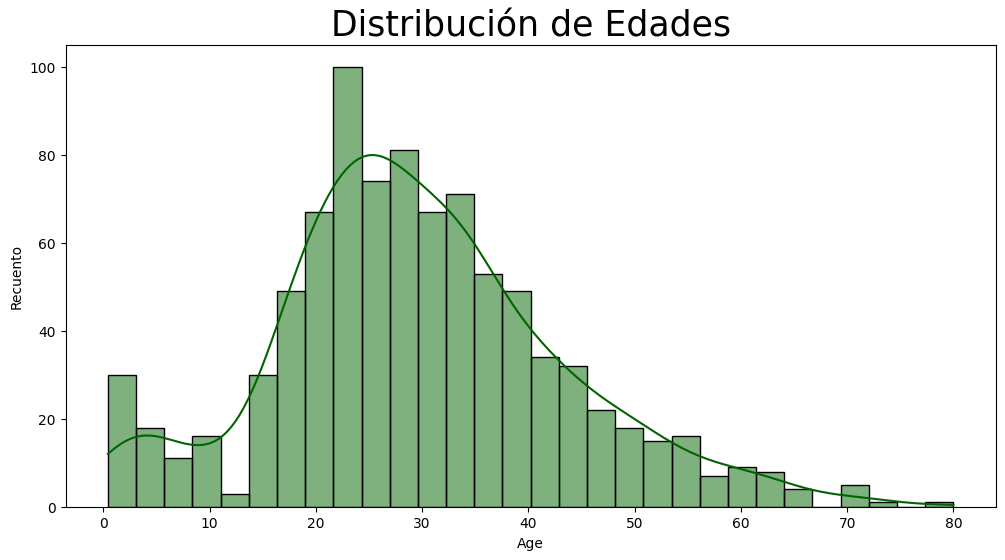

In [392]:
plt.figure(figsize=(12, 6))
sns.histplot(df3['Age'], bins=30, kde=True, color='darkgreen')
plt.title('Distribución de Edades', size=25)
plt.ylabel('Recuento');

Edad mínima y máxima de los pasajeros

In [393]:
display(df3["Age"].sort_values().unique()) # Veamos, de nuevo, las edades ordenadas.
edad_maxima = df3["Age"].max() # Obtenemos la edad máxima.
edad_minima = df3["Age"].min() # Obtenemos la edad mínima.
if edad_minima < 1: # Si la edad mínima es menor a 1 año, mostraremos la edad del recién nacido en meses y la máxima en años
    print(f"El pasajero más joven era un pequeño bebé de {(edad_minima*12)//1} meses, y el de más edad tenía {edad_maxima//1} años.")
else: # Si la edad mínima es mayor a 1 año, mostraremos todas las edades en años
    print(f"El pasajero más joven tenía {edad_minima//1} años, y el de más edad tenía {edad_maxima//1} años.")

array([ 0.42      ,  0.67      ,  0.75      ,  0.83      ,  0.92      ,
        1.        ,  2.        ,  3.        ,  4.        ,  4.33333333,
        5.        ,  6.        ,  7.        ,  7.80666667,  8.        ,
        9.        ,  9.80666667, 10.        , 11.        , 12.        ,
       13.        , 14.        , 14.5       , 15.        , 16.        ,
       17.        , 18.        , 18.66666667, 19.        , 19.5       ,
       19.66666667, 20.        , 20.5       , 21.        , 21.66666667,
       22.        , 22.5       , 22.66666667, 23.        , 23.33333333,
       23.5       , 24.        , 24.5       , 24.66666667, 24.83333333,
       25.        , 25.16666667, 25.33333333, 25.5       , 25.66666667,
       26.        , 26.16666667, 26.33333333, 26.66666667, 26.83333333,
       27.        , 27.33333333, 28.        , 28.16666667, 28.5       ,
       28.66666667, 29.        , 29.16666667, 29.5       , 29.83333333,
       30.        , 30.5       , 31.        , 31.33333333, 32.  

El pasajero más joven era un pequeño bebé de 5.0 meses, y el de más edad tenía 80.0 años.


##### Tarifa

In [394]:
df3["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [395]:
df3["Fare"].sum() # Todas las tarifas sumaron un total de 28693.95 libras..

28693.9493

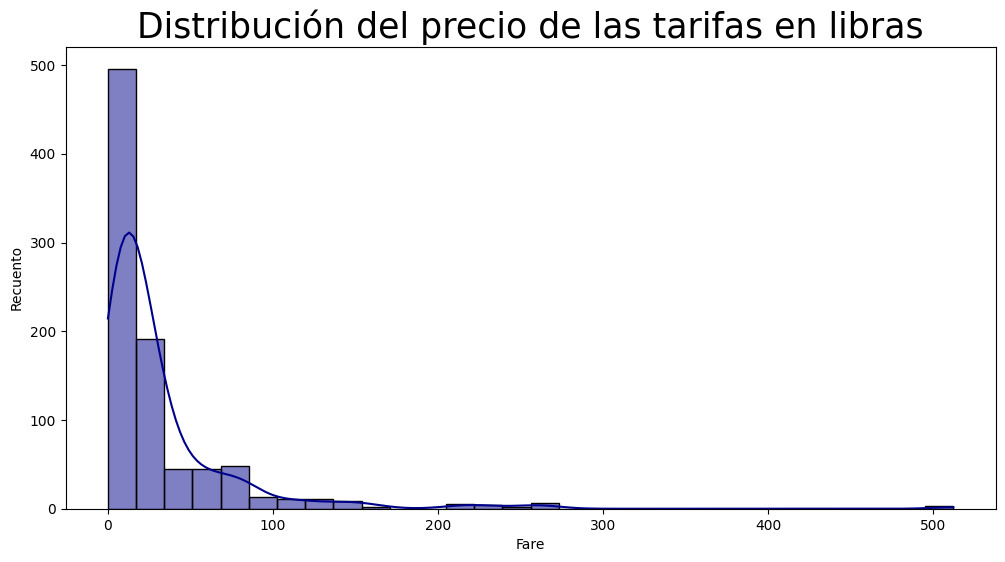

In [396]:
plt.figure(figsize=(12, 6))
sns.histplot(df3['Fare'], bins=30, kde=True, color='darkblue')
plt.title('Distribución del precio de las tarifas en libras', size=25)
plt.ylabel('Recuento');

##### Tarifa en euros

In [397]:
df3["Euro_Fare"].describe()

count      891.000000
mean      3598.790376
std       5553.194563
min          0.000000
25%        883.979864
50%       1615.243446
75%       3464.221253
max      57252.312998
Name: Euro_Fare, dtype: float64

In [398]:
df3["Euro_Fare"].sum() #.. que equivaldrían a 3,2 millones de euros actuales

3206522.225319676

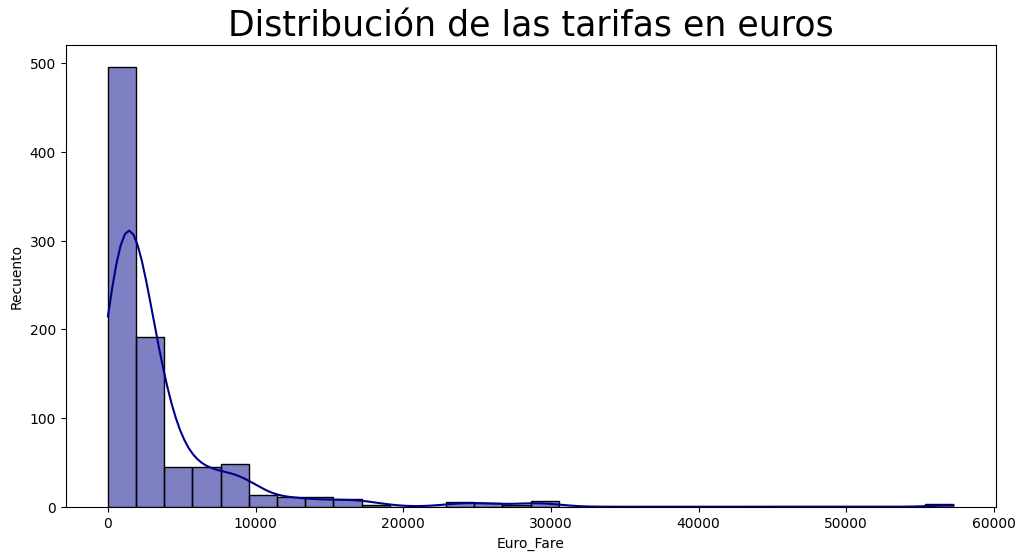

In [399]:
plt.figure(figsize=(12, 6))
sns.histplot(df3['Euro_Fare'], bins=30, kde=True, color='darkblue')
plt.title('Distribución de las tarifas en euros', size=25)
plt.ylabel('Recuento'); # La distribución de las tarifas en euros no cambia, no es necesario graficarla

Vamos a ver cuáles fueron las tarifas más altas y más bajas

In [400]:
tarifa_maxima_libras = round(df3["Fare"].max(), 2) # Tarifa máxima en libras de 1912, redondeado a 2 decimales
tarifa_minima_libras = round(df3["Fare"].min(), 2) # Tarifa mínima en libras de 1912 --
tarifa_maxima_euros = round(df3["Euro_Fare"].max(), 2) # Tarifa máxima en euros de abril de 2024 --
tarifa_minima_euros = round(df3["Euro_Fare"].min(), 2) # Tarifa mínima en euros de abril de 2024 --
print(f"La tarifa menos cara fue de {tarifa_minima_libras} libras de 1912, equivalente a {tarifa_minima_euros} euros de abril de 2024, y la tarifa más cara fue de {tarifa_maxima_libras} libras de 1912, equivalente a {tarifa_maxima_euros} euros de abril de 2024.")

La tarifa menos cara fue de 0.0 libras de 1912, equivalente a 0.0 euros de abril de 2024, y la tarifa más cara fue de 512.33 libras de 1912, equivalente a 57252.31 euros de abril de 2024.


#### Variables Categóricas

##### Sexo de los pasajeros

In [401]:
df3["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [402]:
df3["Sex"].value_counts()/len(df3["Survived"])*100 # 577 de los pasajeros, un 64,76%, eran hombres, y 314, un 35,24%, eran mujeres

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64

##### Puerto de embarcación

In [403]:
df3["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [404]:
df3["Embarked"].value_counts()/len(df3["Survived"])*100 # 72,5% embarcaron en Southampton, 18,86% en Cherburgo y 8,64% en Queenstown

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64

In [405]:
fig1 = px.pie(df3, values = df3["Embarked"].value_counts().values, template = "plotly_dark", title = "Número total y relativo de pasajeros según su puerto de embarcación", width = 700, height = 400, names = df3["Embarked"].value_counts().index)
fig1.update_traces(textinfo = "value + percent")
fig1.update_legends(title = "Puerto de embarcación")

Puertos: 72,5% a Southampton, 18,9% a Cherburgo y el 8,6% restante a Queenstown

##### Grupos de edad (NUEVA VARIABLE)

Agrupamos los pasajeros según su edad

In [406]:
def age_group(age):
    if age < 10:
        return 'Kid'
    elif 10 <= age < 18:
        return 'Teen'
    elif 18 <= age <= 45:
        return 'Adult'
    else:
        return 'Third age'

df3['AgeGroup'] = df3['Age'].apply(age_group)

In [407]:
df3["AgeGroup"].value_counts()

AgeGroup
Adult        662
Third age    108
Kid           69
Teen          52
Name: count, dtype: int64

In [408]:
df3["AgeGroup"].value_counts()/len(df3["AgeGroup"])*100 # La mayoría de los pasajeros (74,3%) eran adultos (de 18 a 45 años), 
# seguidos por la gente de tercera edad (más de 45 años), con un 12,1%. Los niños menores de 10 años supusieron el 5,8% de los 
# pasajeros, y los adolescentes (entre 10 y 18), el 7,7%

AgeGroup
Adult        74.298541
Third age    12.121212
Kid           7.744108
Teen          5.836139
Name: count, dtype: float64

##### Nombre honorífico (NUEVA VARIABLE)

In [409]:
df3["Honorific_Name"] = df2["Name"].apply(lambda x: x.split(". ")[0].split(" ")[-1])
# Partimos el nombre en dos partes donde está el punto y nos quedamos lo que está a la izquierda del punto, y cortamos esa parte según los espacios
# y nos quedamos con lo que está a la derecha del último espacio.

df3["Honorific_Name"].value_counts()

Honorific_Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Esta variable puede ser útil porque otorga cierta información de manera indirecta, como el sexo de la persona (si es hombre o mujer), su edad (si es más joven o más adulto), su oficio (Dr para los educados, Rev para estudios religiosos, Major, Col y Capt para rangos militares...), su estado civil (casado o no) y si proviene de una familia noble (condes, nobles...)

In [410]:
df3["Honorific_Name"].value_counts()

Honorific_Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [411]:
df3["Honorific_Name"].value_counts()/len(df3["Honorific_Name"])*100 # Los más comunes son los siguientes:

Honorific_Name
Mr          58.024691
Miss        20.426487
Mrs         14.029181
Master       4.489338
Dr           0.785634
Rev          0.673401
Mlle         0.224467
Major        0.224467
Col          0.224467
Countess     0.112233
Capt         0.112233
Ms           0.112233
Sir          0.112233
Lady         0.112233
Mme          0.112233
Don          0.112233
Jonkheer     0.112233
Name: count, dtype: float64

Mr. (58%) se usa en chicos y hombres, Miss (20%) y Mlle (mademoiselle, 2 mujeres) en mujeres solteras y chicas jóvenes, Mrs. (14%) y Mme. (madamme, 
1 mujer) en mujeres casadas, Ms. (1 mujer) en mujeres en las que se desconoce su estado civil o no es relevante, y Master (4,5%) en niños, 
o chicos/hombres jóvenes que tienen gente trabajando para ellos o que son muy habilidosos en algo u hombres expertos de alguna profesión.

Los demás títulos son más escasos, pero significan lo siguiente: 

Dr. (Doctor o gente con mucha educación), Rev. (Reverendo, miembros religiosos), Major. y Col. (mayor y sargento, militares de alto rango), Jonkheer. 
(título nobiliario holandés para hombres jóvenes y no casados), Countess. (condesas), Don. (título español para hombres), Lady. (dama), 
Sir. (título de caballero) y Capt. (capitán, que podría estar relacionadao también con un rango militar algo menor a Major o almirante)

* Nota: la suma de Miss., Mrs., Mlle., Countess., Mme., Ms., Lady. y 1 Doctora suman 314, que es el número de mujeres en el barco.

### Tras realizar un análisis individual de las variables con las que vamos a trabajar, indaguemos un poco más en sus relaciones.

#### Relaciones entre 2 variables: combinaciones entre `Survived` - `X`

##### Número de supervivientes por sexo

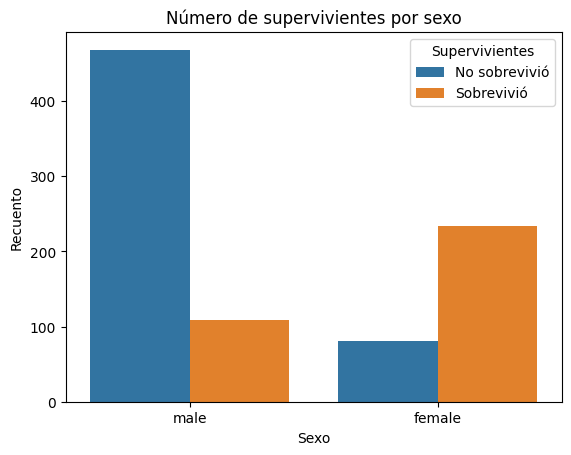

In [412]:
fig3 = sns.countplot(x="Sex", hue="Survived", data=df3)
fig3.set_title('Número de supervivientes por sexo')
fig3.set_ylabel('Recuento')
fig3.set_xlabel('Sexo')
fig3.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig3;

Sobrevivieron menos hombres que mujeres en total, la ratio de supervivencia de ellos fue menor que la de ellas, probablemente porque fueron las primeras en ser evacuadas

##### Número de supervivientes según si se conocía su `Cabin` o no

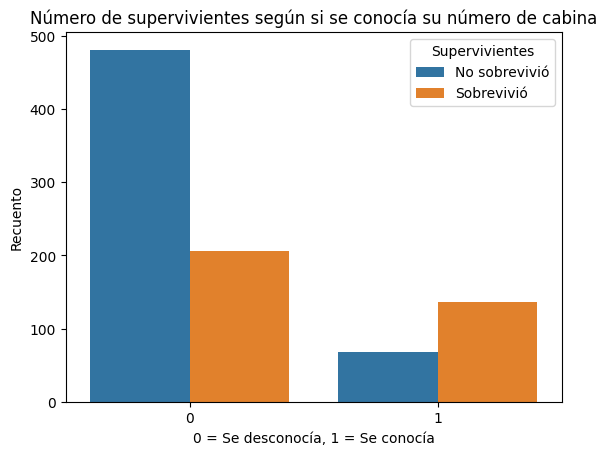

In [462]:
fig4 = sns.countplot(data=df3, x="Binary_Cabin", hue="Survived")
fig4.set_title('Número de supervivientes según si se conocía su número de cabina')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('0 = Se desconocía, 1 = Se conocía')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig4;

Como faltan muchos datos, hay que cogerlos con pinzas, como se suele decir. Pero de este gráfico se dibuja una extraña relación: la ratio de supervivencia fue mayor en aquellos pasajeros en los que se conocía su cabina, mientras que la mayor parte de los pasajeros que fallecieron no se conocía su número de cabina. De todas formas, esto podría ser accidental, porque no se conocía el número de cabina de la mayoría de supervivientes. Aún así, es un dato a tener en cuenta.

##### Número de supervivientes por tramo de edad

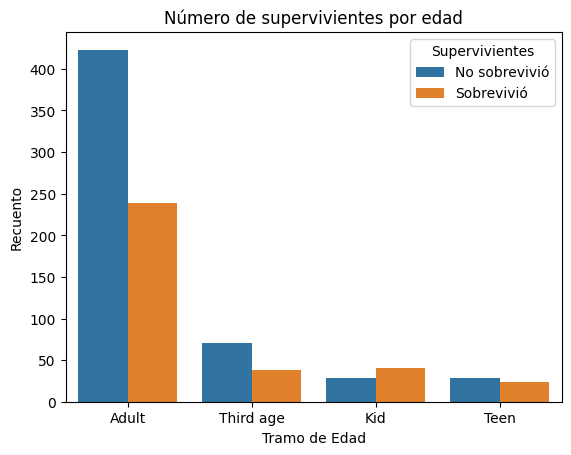

In [413]:
fig4 = sns.countplot(data=df3, x="AgeGroup", hue="Survived")
fig4.set_title('Número de supervivientes por edad')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('Tramo de Edad')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig4;

La mayoría de las víctimas fueron adultos (entre 18 y 45 años), seguidas por los mayores (más de 45 años) y los menores, seguramente se priorizaron mujeres, niños y ancianos en las evacuaciones

##### Número de supervivientes por clase del pasajero

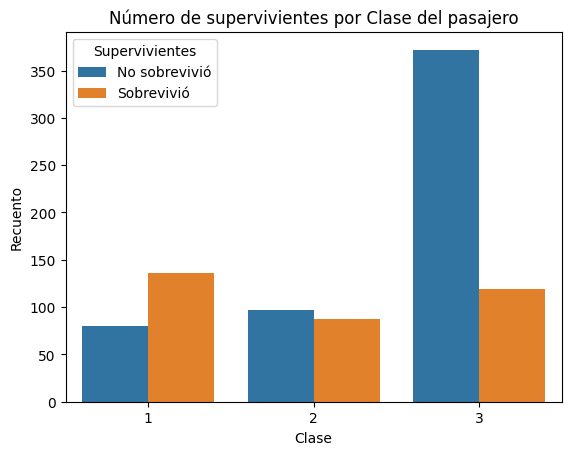

In [422]:
fig4 = sns.countplot(data=df3, x="Pclass", hue="Survived")
fig4.set_title('Número de supervivientes por Clase del pasajero')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('Clase')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig4;

La 3ª clase (clase mayoritaria) fue el grupo con más fallecidos, y la 1ª clase el que menos fallecidos tuvo.

##### Número de supervivientes por puerto del pasajero

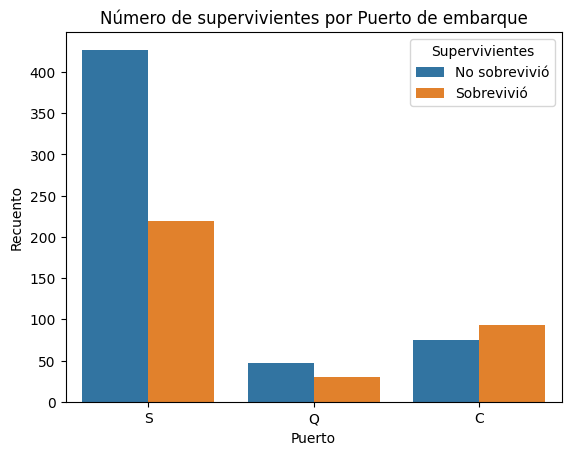

In [423]:
fig4 = sns.countplot(data=df3, x="Embarked", hue="Survived")
fig4.set_title('Número de supervivientes por Puerto de embarque')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('Puerto')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])
fig4;

La mayoría del puerto Cherburgo sobrevivieron, y la diferencia más grande entre fallecidos y supervivientes se dio en Southampton

##### Número de supervivientes por nombre honorífico del pasajero

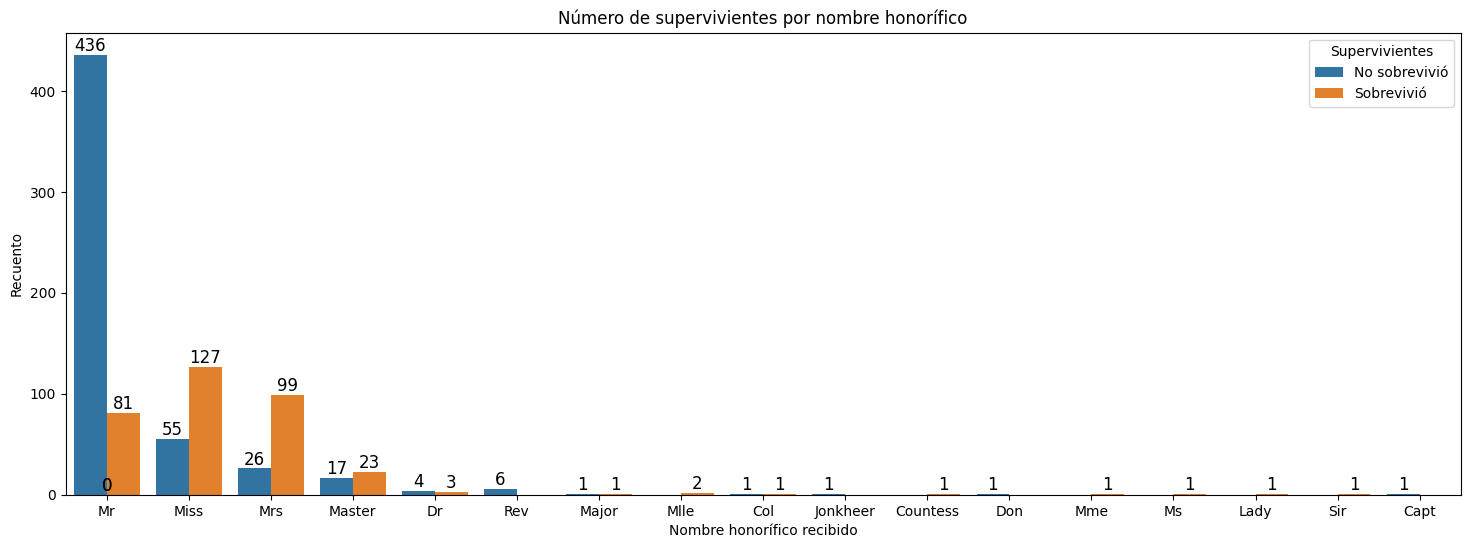

In [459]:
plt.figure(figsize=(18, 6))  # Set the figure size in inches (width, height)
fig4 = sns.countplot(data=df3, x="Honorific_Name", hue="Survived", order=df3["Honorific_Name"].value_counts().index)
fig4.set_title('Número de supervivientes por nombre honorífico')
fig4.set_ylabel('Recuento')
fig4.set_xlabel('Nombre honorífico recibido')
fig4.legend(title='Supervivientes', labels=['No sobrevivió', 'Sobrevivió'])

for p in fig4.patches:
    fig4.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

En este gráfico se visualiza el número total de supervivientes según el nombre honorífico del pasajero. Comprobando los comentarios anteriormente realizados sobre estos nombres, se puede ver que aquellos nombres atribuidos a mujeres (Miss., Mrs., Mlle., Mme., Ms. y Lady.), niños (Master.) y la nobleza (Countess = Condesa) tuvieron un mayor número de supervivientes. De hecho, de los 342 supervivientes, 255 son únicamente mujeres "normales", niños y 2 mujeres de la nobleza (el otro noble que quedaba era un hombre), casi un 75% del total de supervivientes. Si añadimos los 81 supervivientes "Mr." nos situaremos en los 336 supervivientes, un 98% del total. Los 6 supervivientes restantes son 3 Doctores (2 hombres y 1 mujer). Visto desde la perspectiva opuesta, de los 549 fallecidos en total, 436 se corresponden únicamente con hombres "normales", un 79,4% de los datos.

En conclusión, con este gráfico se refuerza la idea de que los salvamentos se centraron en poner a salvo a mujeres, niños y mujeres de la nobleza (y de las clases de pasajero superiores) en primer lugar, para seguir con los hombres finalmente, pero es probable que no hubiera recursos suficientes para todos, generando el grueso de las pérdidas humanas (4 de cada 5 fallecidos).

** Nota: hombres y mujeres "normales" quiere decir que no se puede extraer una profesión a partir de su nombre honorífico, como puede ser el caso de un Doctor o un militar.

##### Relación entre supervivencia y tarifa

In [414]:
fig7 = px.scatter(df3, x="Euro_Fare", y="Survived", template = "plotly_dark", size = "Pclass", color = "Sex", title = "Relación entre la supervivencia del pasajero y sus características")
fig7.update_yaxes(tickvals=[0, 1], ticktext=["No sobrevivió", "Sobrevivió"])

No se perciben diferencias

#### Relaciones entre más de 2 variables

##### Número de pasajeros según su puerto de embarcación y sexo 

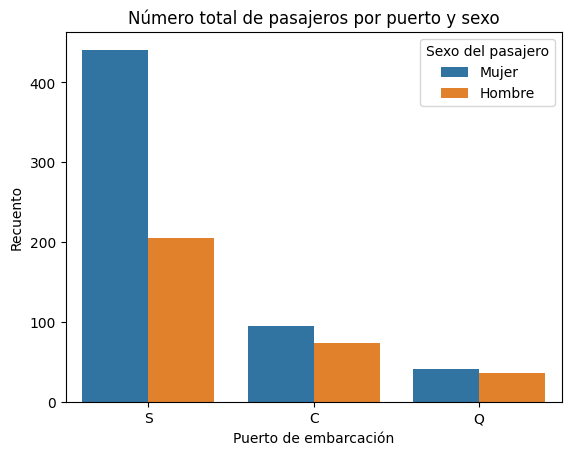

In [415]:
fig2 = sns.countplot(x='Embarked', hue='Sex', data=df3)
fig2.set_title('Número total de pasajeros por puerto y sexo')
fig2.set_ylabel('Recuento')
fig2.set_xlabel('Puerto de embarcación')
fig2.legend(title='Sexo del pasajero', labels=['Mujer', 'Hombre'])
fig2;

La mayoría de pasajeros en todos los puertos fueron hombres, con una mayor diferencia en los pasajeros de Southampton, el cual a su vez es el puerto con mayor número de pasajeros.

##### Número de supervivientes según el grupo de edad y sexo

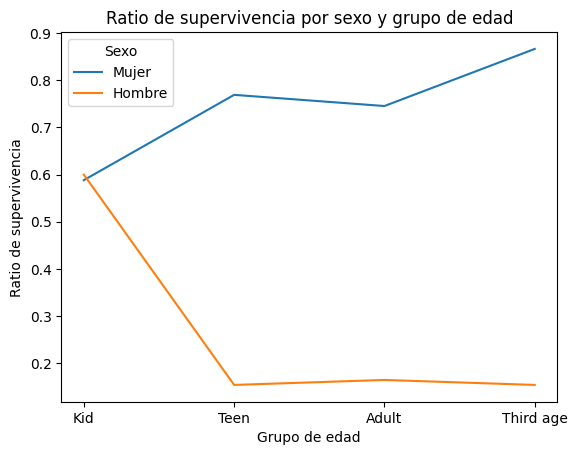

In [416]:
age_mapping = {"Kid": 0, "Teen": 1, "Adult": 2, "Third_age": 3}
df3['AgeGroupOrder'] = df3['AgeGroup'].map(age_mapping)
df3 = df3.sort_values('AgeGroupOrder')

figura5 = sns.lineplot(data=df3, x = df3["AgeGroup"], y = df3["Survived"], hue=df3["Sex"], errorbar=None)
figura5.set_title('Ratio de supervivencia por sexo y grupo de edad')
figura5.set_ylabel('Ratio de supervivencia')
figura5.set_xlabel('Grupo de edad')
figura5.legend(title='Sexo', labels=['Mujer', 'Hombre'])
figura5;

df3 = df3.drop(columns='AgeGroupOrder')

Las mujeres tuvieron una ratio de supervivencia superior con respecto a los hombres para todas las categorías de edad excepto en los niños menores de 10 años, que tuvieron ambos alrededor de un 60%

##### Número de supervivientes según su clase y sexo

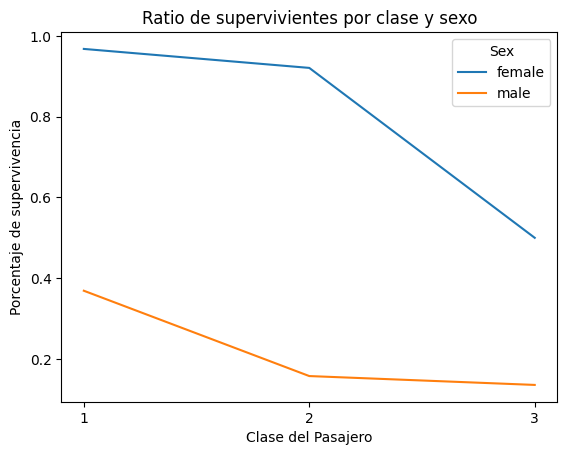

In [417]:
fig6 = sns.lineplot(data=df3, x = df3["Pclass"], y = df3["Survived"], hue=df3["Sex"], errorbar=None)
fig6.set_title('Ratio de supervivientes por clase y sexo')
fig6.set_ylabel('Porcentaje de supervivencia')
fig6.set_xlabel('Clase del Pasajero')
fig6.set_xticks([1, 2, 3]);

A mayor clase del pasajero, mayor tasa de supervivencia asociada, en ambos sexos, y siendo las tasas femeninas superiores.

##### Número de supervivientes según su edad y clase

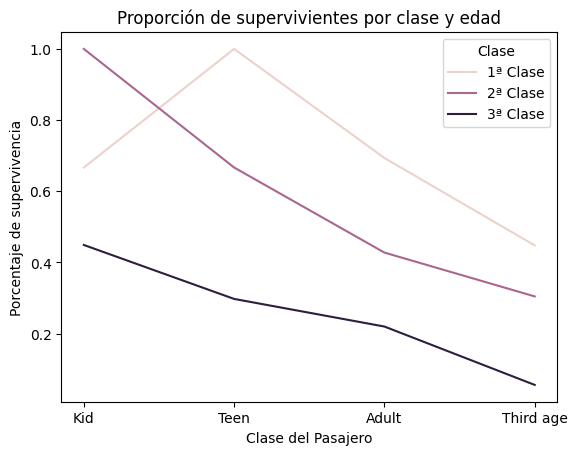

In [418]:
fig6 = sns.lineplot(data=df3, x = df3["AgeGroup"], y = df3["Survived"], hue=df3["Pclass"], errorbar=None)
fig6.set_title('Proporción de supervivientes por clase y edad')
fig6.set_ylabel('Porcentaje de supervivencia')
fig6.set_xlabel('Clase del Pasajero')
fig6.legend(title='Clase', labels=['1ª Clase', '2ª Clase', '3ª Clase']);

Los pasajeros en 3ª clase tuvieron menor ratio de supervivencia. En los niños, los de segunda clase tuvieron mayor ratio que los de primera, pero menor para el resto de grupos de edad. A mayor edad, menores ratios de supervivencia. Peor grupo: pasajeros más mayores de 3ª clase.

# Notas en sucio

Identificamos los tipos de ticket

In [419]:
df2["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Vemos que hay un total de 681 tickets distintos, por lo que hay un total de 681 grupos de pasajeros (algunos, grupos de 1 solo pasajero). Hablo de grupos porque no siempre son necesariamente familias.

En casos como CA. 2343 o 347082, parece que identifican grupos de familiares (familia Sage y Andersson respectivamente), mientras que en otros parecen que identifican grupos de amigos, como parece ser el caso del ticket 1601, un grupo de 6 hombres asiáticos. También hay otros grupos, como el S.O.C. 14879, híbrido, conformado por un grupo de 5 personas, 3 de ellas hermanos, y los dos restantes no son familiares entre sí.

In [420]:
df2["Ticket"].value_counts().head(10)

Ticket
347082          7
CA. 2343        7
1601            7
3101295         6
CA 2144         6
347088          6
S.O.C. 14879    5
382652          5
LINE            4
PC 17757        4
Name: count, dtype: int64

 Hablamos de algunos de los primeros:

- CA. 2343, familia Sage, parece un grupo de 7 hermanos, 4 hombres y 3 mujeres, de edad indeterminada, de 3ª clase.

- 347082, familia Andersson, una familia con dos padres de 39 años y 5 hijos menores de 12 años, de 3ª clase.

- 347088, familia Skoog, una familia con 2 padres mayores de 40 años y 4 hijos, 3 niños y 2 niñas, menores de 11 años y de 3ª clase.

- 1601, un grupo de 7 hombres asiáticos, 4 con edades confirmadas, de 3ª clase.

- CA 2144, familia Goodwin, 1 madre de 43 años con sus 5 hijos, el mayor una chica de 16 años, de 3ª clase.

- S.O.C. 14879, 3 hermanos Hickman y 2 amigos, jóvenes, de 2ª clase.

En definitiva, cuando esta variable aparece varias veces (un mismo ticket se repite), nos indica que varias personas decidieron viajar juntas, ya fuesen familiares o conocidos. En caso contrario (un ticket por persona), indica pasajeros que viajaron solos.